<a href="https://colab.research.google.com/github/ChidiebereEke2205/dissertation/blob/main/Random_Under_Sampling_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
churn = pd.read_csv('/content/Customer-Churn-Records.csv')
churn.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   
2        113931.57       1         1                   3   DIAMOND   
3         93826.63       0         0                   5      GOLD   
4         79084.10       0         0                   5      GOLD   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

In [ ]:
churn.tail()

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
9995         96270.64       0         0                   1   DIAMOND   
9996        101699.77       0         0                   5  PLATINUM   
9997         42085.58       1         1                   3    SILVER   
9998         92888.52       1         1                   2      GOLD   
9999         38190.78       0         0                   3   DIAMOND   

      Point Earned  
9995           300  
9996           771  
9997           564  
9998           339  
9999           911

In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [ ]:
churn.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited      Complain  Satisfaction Score  \
count     10000.000000  10000.000000  10000.000000        10000.000000   
mean     100090.239881      0.203800      0.204400            3.013800   
std       57510.492818      0.402842      0.403283            1.405919   
min          11.580000      0.000000      0.000000            1.000000   
25%       51002.110000      0.000000      0.000000            2.000000   
50%      100193.915000      0.000000      0.000000            3.000000   
75%      149388.247500      0.000000      0.000000            4.000000   
max      199992.480000      1.000000      1.000000            5.000000   

       Point Earned  
count  10000.000000  
mean     606.515100  
std      225.924839  
min      119.000000  
25%      410.000000  
50%      605.000000  
75%      801.000000  
max     1000.000000

In [ ]:
churn.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [ ]:
churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [ ]:
churn = churn.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [ ]:
churn.head(6)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   
5          645     Spain    Male   44       8  113755.78              2   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Complain  \
0          1               1        101348.88       1         1   
1          0               1        112542.58       0         1   
2          1               0        113931.57       1         1   
3          0               0         93826.63       0         0   
4          1               1         79084.10       0         0   
5          1               0        149756.71       1         1   

   Satisfaction Score Card Type  Point Earned  
0                   2   DIAMOND           464  
1                   3   DIAMOND           456  
2                   3   DIAMOND           377  
3                   5      GOLD           350  
4                   5      GOLD           425  
5                   5   DIAMOND           484

In [ ]:
churn.describe()

CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  \
count  10000.00000    10000.000000     10000.000000  10000.000000   
mean       0.70550        0.515100    100090.239881      0.203800   
std        0.45584        0.499797     57510.492818      0.402842   
min        0.00000        0.000000        11.580000      0.000000   
25%        0.00000        0.000000     51002.110000      0.000000   
50%        1.00000        1.000000    100193.915000      0.000000   
75%        1.00000        1.000000    149388.247500      0.000000   
max        1.00000        1.000000    199992.480000      1.000000   

           Complain  Satisfaction Score  Point Earned  
count  10000.000000        10000.000000  10000.000000  
mean       0.204400            3.013800    606.515100  
std        0.403283            1.405919    225.924839  
min        0.000000            1.000000    119.000000  
25%        0.000000            2.000000    410.000000  
50%        0.000000            3.000000    605.000000  
75%        0.000000            4.000000    801.000000  
max        1.000000            5.000000   1000.000000

In [ ]:
!pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.3/356.3 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 23.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27079 sha256=d69c28134e2e743ffdf64002fc406775508e65c7f40b2ef191fa639944f9e9f8
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

In [ ]:
import pandas_profiling

<ipython-input-12-6a00893fb3e1>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [ ]:
pandas_profiling.ProfileReport(pd.read_csv('/content/Customer-Churn-Records.csv'))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<ipython-input-14-cdf79bb9148a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = churn.corr()


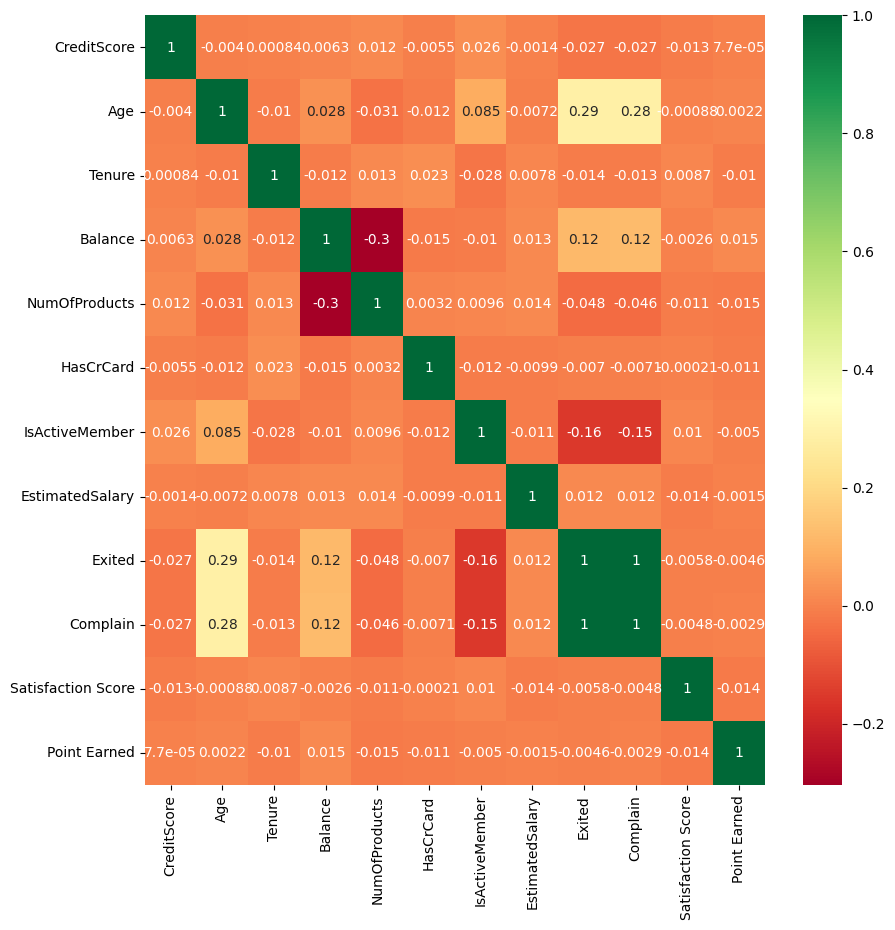

In [ ]:
corrmat = churn.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g = sns.heatmap(churn[top_corr_features].corr(),annot=True,cmap="RdYlGn")

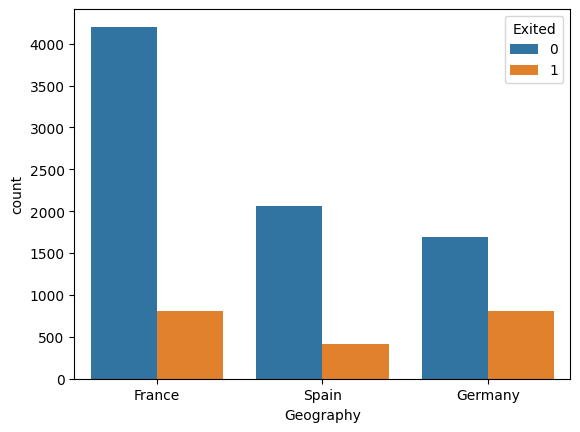

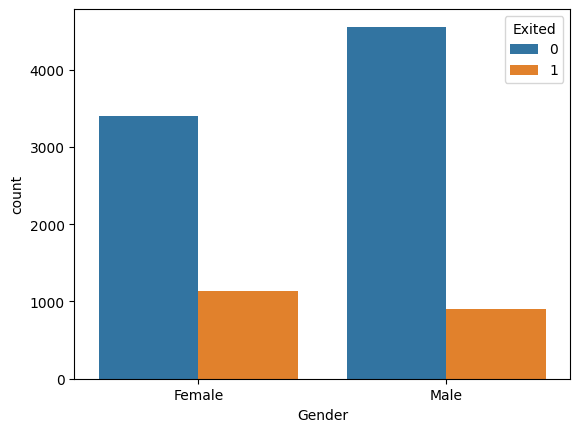

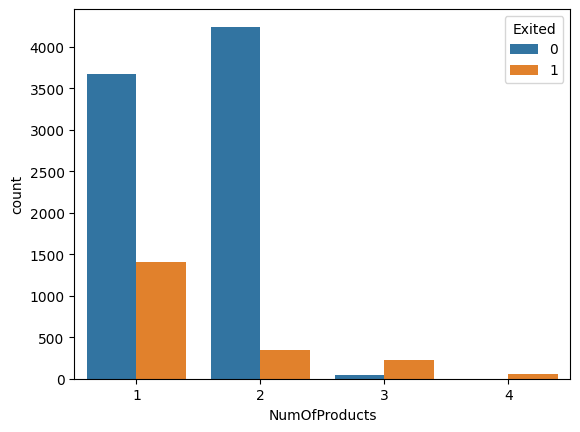

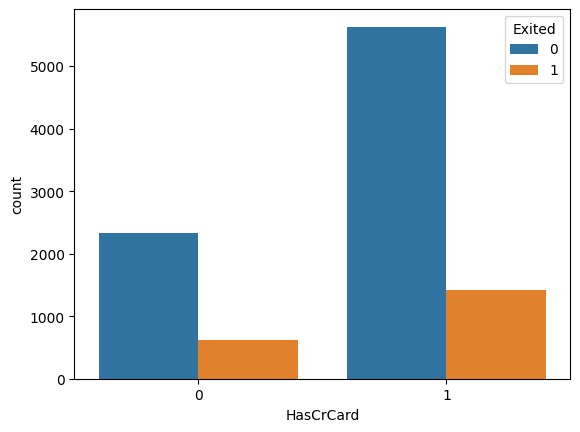

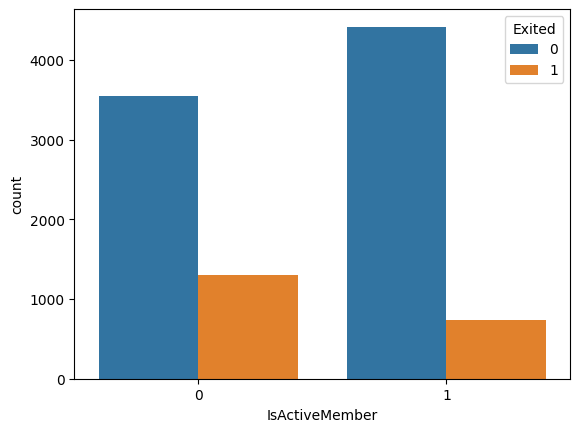

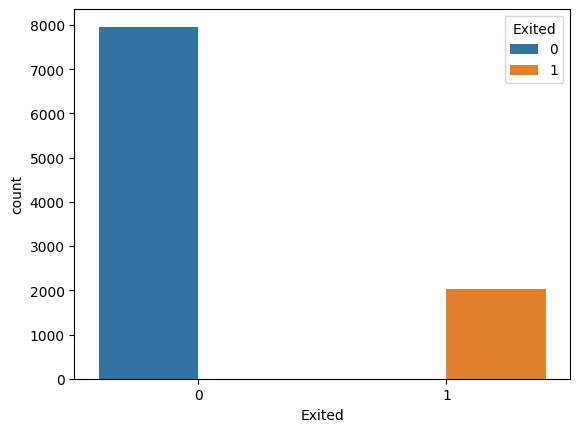

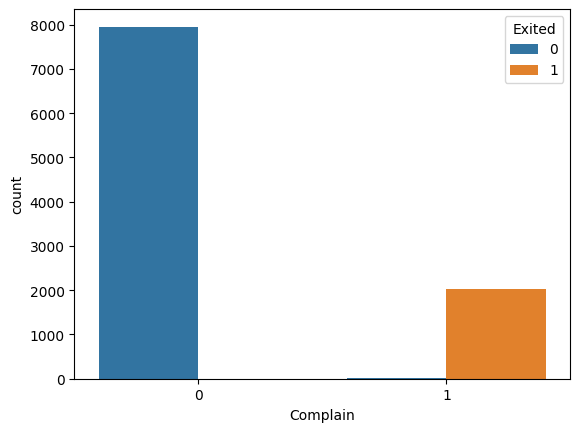

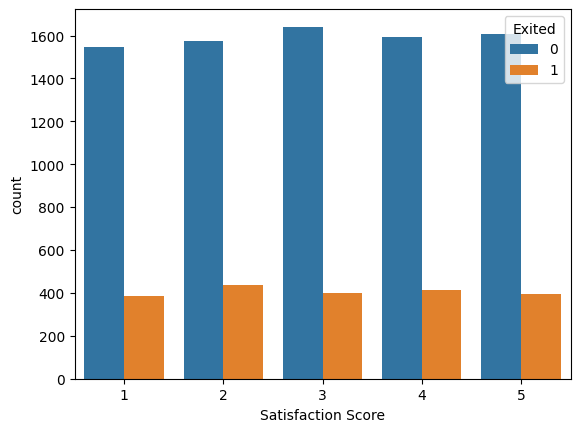

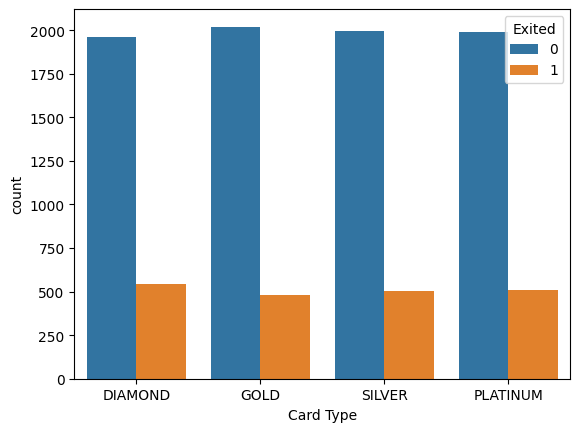

In [ ]:
for i, predictor in enumerate(churn.drop(columns=['Tenure', 'EstimatedSalary','Balance','Age', 'CreditScore', 'Point Earned'])):
    plt.figure(i)
    sns.countplot(data = churn, x = predictor, hue = 'Exited')

In [ ]:
churn['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
churn['Card Type'].unique()

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

In [ ]:
churn['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
churn= pd.get_dummies(churn, drop_first=True)
churn.head(5)

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Complain  Satisfaction Score  \
0               1        101348.88       1         1                   2   
1               1        112542.58       0         1                   3   
2               0        113931.57       1         1                   3   
3               0         93826.63       0         0                   5   
4               1         79084.10       0         0                   5   

   Point Earned  Geography_Germany  Geography_Spain  Gender_Male  \
0           464                  0                0            0   
1           456                  0                1            0   
2           377                  0                0            0   
3           350                  0                0            0   
4           425                  0                1            0   

   Card Type_GOLD  Card Type_PLATINUM  Card Type_SILVER  
0               0                   0                 0  
1               0                   0                 0  
2               0                   0                 0  
3               1                   0                 0  
4               1                   0                 0

In [ ]:
x = churn.drop('Exited', axis=1)
y = churn['Exited']

In [ ]:
x.head(5)

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Complain  Satisfaction Score  \
0               1        101348.88         1                   2   
1               1        112542.58         1                   3   
2               0        113931.57         1                   3   
3               0         93826.63         0                   5   
4               1         79084.10         0                   5   

   Point Earned  Geography_Germany  Geography_Spain  Gender_Male  \
0           464                  0                0            0   
1           456                  0                1            0   
2           377                  0                0            0   
3           350                  0                0            0   
4           425                  0                1            0   

   Card Type_GOLD  Card Type_PLATINUM  Card Type_SILVER  
0               0                   0                 0  
1               0                   0                 0  
2               0                   0                 0  
3               1                   0                 0  
4               1                   0                 0

In [ ]:
y.head(5)

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [ ]:
churn['Exited'].value_counts()

0    7962
1    2038
Name: Exited, dtype: int64

Text(0.5, 1.0, 'Exited')

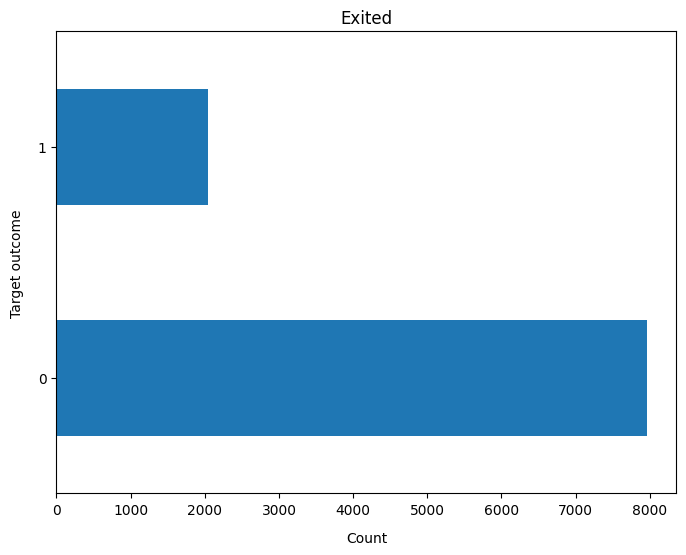

In [ ]:
churn['Exited'].value_counts().plot(kind='barh', figsize=(8,6))
plt.xlabel("Count", labelpad=10)
plt.ylabel("Target outcome", labelpad=10)
plt.title("Exited")

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Create an instance of RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Perform undersampling
x_res, y_res = undersampler.fit_resample(x, y)


Text(0.5, 1.0, 'Exited (After Undersampling)')

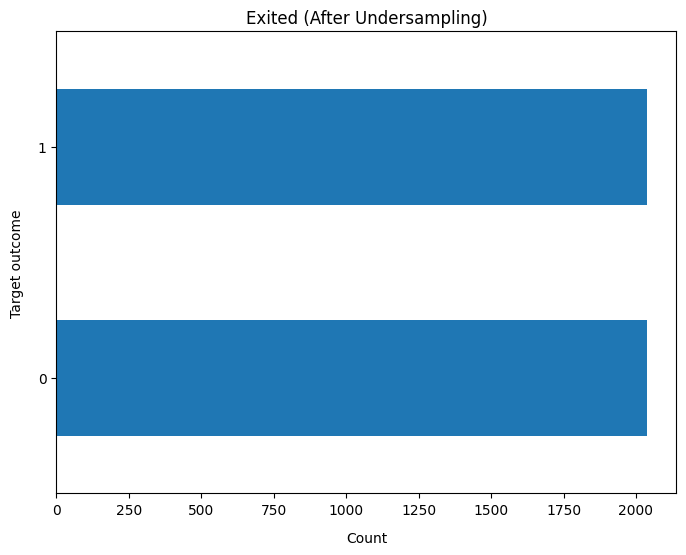

In [ ]:
pd.Series(y_res).value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=10)
plt.ylabel("Target outcome", labelpad=10)
plt.title("Exited (After Undersampling)")

In [ ]:
y_res.value_counts()

0    2038
1    2038
Name: Exited, dtype: int64

In [ ]:
X = x_res
Y = y_res

In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [ ]:
x_train.shape,y_train.shape

((3260, 17), (3260,))

In [ ]:
x_test.shape, y_test.shape

((816, 17), (816,))

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[ 1.91615819,  0.55196533,  0.02272669, ...,  1.71939253,
        -0.56837659, -0.57451663],
       [ 0.25535697, -0.67346767, -1.01107341, ...,  1.71939253,
        -0.56837659, -0.57451663],
       [ 0.51324536, -0.86199583, -0.66647338, ...,  1.71939253,
        -0.56837659, -0.57451663],
       ...,
       [-0.00253142, -1.14478806, -1.01107341, ..., -0.58160076,
         1.75939688, -0.57451663],
       [ 1.82331837,  0.74049348, -1.70027347, ..., -0.58160076,
        -0.56837659,  1.74059365],
       [ 1.87489605,  0.2691731 , -0.66647338, ...,  1.71939253,
        -0.56837659, -0.57451663]])

In [ ]:
# Doing PCA for scaled data
from sklearn.decomposition import PCA

pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [ ]:
#A float type array which contains variance ratios for each principal component
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.10671499, 0.08041919, 0.07934081, 0.07395328, 0.06440361,
       0.06261296, 0.06076384, 0.06040215, 0.05925686, 0.05735775,
       0.05683324, 0.05621445, 0.0527355 , 0.04761387, 0.03382358,
       0.02778947, 0.01976445])

In [ ]:
#Using PCA to train our algorithm
pca = PCA(n_components=10)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [ ]:
#Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
lr_pred_y = log_reg.predict(x_test)


In [ ]:
print("Accuracy_score =", accuracy_score(y_test, lr_pred_y))
print("precision_score =", precision_score(y_test, lr_pred_y))
print("recall_score =", recall_score(y_test, lr_pred_y))
print("f1_score =", f1_score(y_test,lr_pred_y))

Accuracy_score = 0.9142156862745098
precision_score = 0.904
recall_score = 0.9088471849865952
f1_score = 0.9064171122994653


In [ ]:
#confusion matrix and classification report
lr_cm=confusion_matrix(y_test,lr_pred_y)
print('confusion matrix is',lr_cm)
print('classification report is',classification_report(y_test,lr_pred_y))

confusion matrix is [[407  36]
 [ 34 339]]
classification report is               precision    recall  f1-score   support

           0       0.92      0.92      0.92       443
           1       0.90      0.91      0.91       373

    accuracy                           0.91       816
   macro avg       0.91      0.91      0.91       816
weighted avg       0.91      0.91      0.91       816



<Axes: >

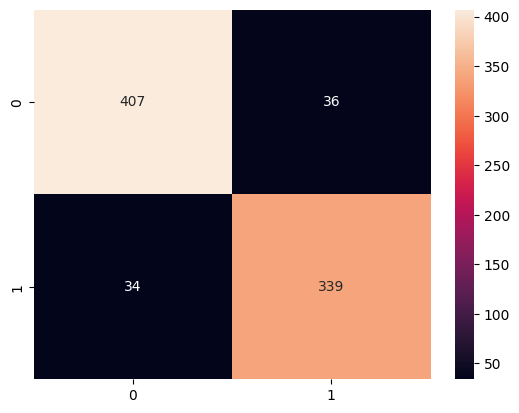

In [ ]:
sns.heatmap(confusion_matrix(y_test,lr_pred_y),annot=True,fmt='d')

Accuracy_score = 0.9142156862745098
precision_score = 0.904
recall_score = 0.9088471849865952
f1_score = 0.9064171122994653


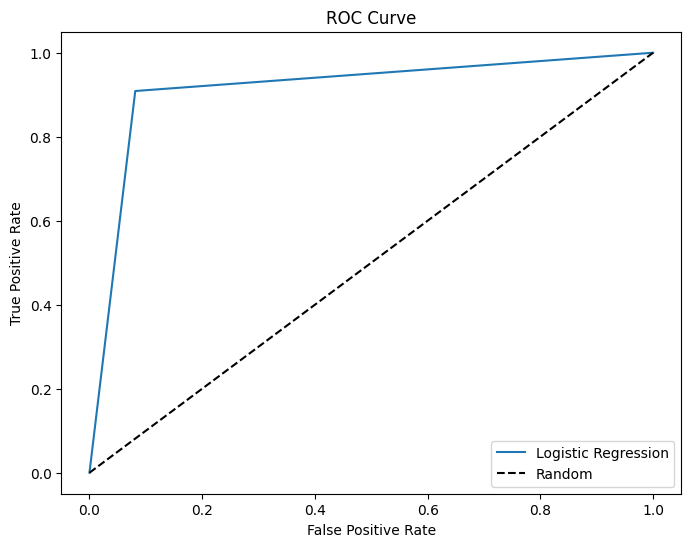

Area Under the Curve (AUC) for Logistic Regression: 0.9137915383172253


In [ ]:
#Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
lr_pred_y = log_reg.predict(x_test)

print("Accuracy_score =", accuracy_score(y_test, lr_pred_y))
print("precision_score =", precision_score(y_test,lr_pred_y))
print("recall_score =", recall_score(y_test, lr_pred_y))
print("f1_score =", f1_score(y_test,lr_pred_y))

# Compute ROC curve using predicted labels (y_pred_rf)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, lr_pred_y)

# Plot ROC curve for Decision Tree
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label= 'Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate Area Under the Curve (AUC) for Random Forest
auc_score_lr = roc_auc_score(y_test,lr_pred_y)
print('Area Under the Curve (AUC) for Logistic Regression:', auc_score_lr)


In [ ]:
#Support Vector
svm = svm.SVC()
svm.fit(x_train,y_train)
pred_svm_y = svm.predict(x_test)

In [ ]:
print("Accuracy_score =", accuracy_score(y_test, pred_svm_y))
print("precision_score =", precision_score(y_test, pred_svm_y))
print("recall_score =", recall_score(y_test, pred_svm_y))
print("f1_score =", f1_score(y_test,pred_svm_y))

Accuracy_score = 0.9215686274509803
precision_score = 0.9098143236074271
recall_score = 0.9195710455764075
f1_score = 0.9146666666666667


In [ ]:
#confusion matrix and classification report
svm_cm=confusion_matrix(y_test,pred_svm_y)
print('confusion matrix is',svm_cm)
print('classification report is',classification_report(y_test,pred_svm_y))

confusion matrix is [[409  34]
 [ 30 343]]
classification report is               precision    recall  f1-score   support

           0       0.93      0.92      0.93       443
           1       0.91      0.92      0.91       373

    accuracy                           0.92       816
   macro avg       0.92      0.92      0.92       816
weighted avg       0.92      0.92      0.92       816



<Axes: >

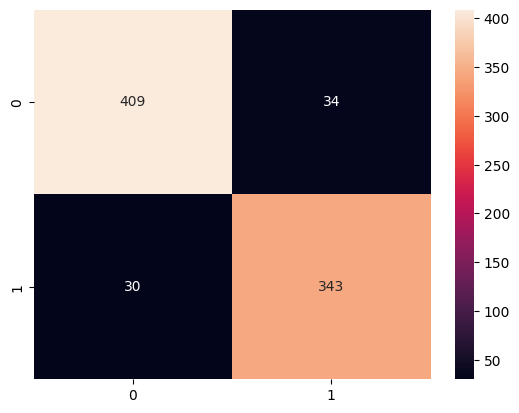

In [ ]:
sns.heatmap(confusion_matrix(y_test,pred_svm_y),annot=True,fmt='d')

Accuracy_score = 0.9215686274509803
precision_score = 0.9098143236074271
recall_score = 0.9195710455764075
f1_score = 0.9146666666666667


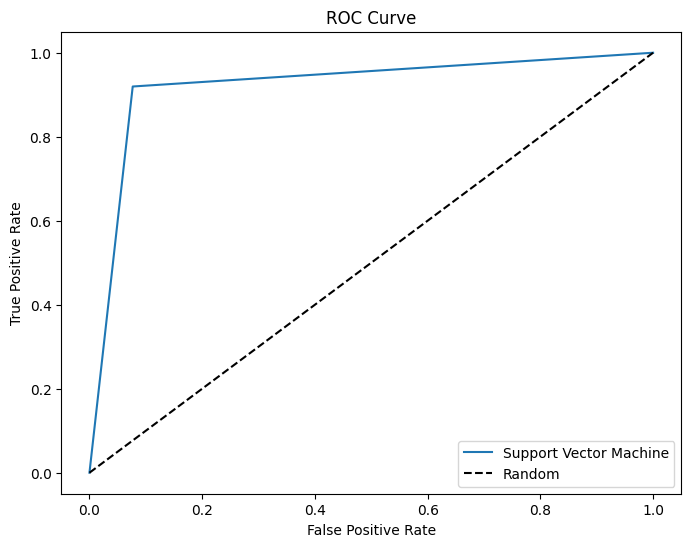

Area Under the Curve (AUC) for Support Vector Machine: 0.9214108049552466


In [ ]:
#Support Vector
svm = SVC()
svm.fit(x_train,y_train)
pred_svm_y = svm.predict(x_test)

print("Accuracy_score =", accuracy_score(y_test, pred_svm_y))
print("precision_score =", precision_score(y_test, pred_svm_y))
print("recall_score =", recall_score(y_test, pred_svm_y))
print("f1_score =", f1_score(y_test,pred_svm_y))
# Compute ROC curve using predicted labels (y_pred_rf)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, pred_svm_y)

# Plot ROC curve for Decision Tree
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label= 'Support Vector Machine')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate Area Under the Curve (AUC) for Random Forest
auc_score_svm = roc_auc_score(y_test,pred_svm_y)
print('Area Under the Curve (AUC) for Support Vector Machine:', auc_score_svm)

In [ ]:
#Naive Bayes
nb = GaussianNB()
nb.fit(x_train, y_train)
pred_nb_y = nb.predict(x_test)

In [ ]:
print("Accuracy_score =", accuracy_score(y_test, pred_nb_y ))
print("precision_score =", precision_score(y_test,pred_nb_y ))
print("recall_score =", recall_score(y_test, pred_nb_y ))
print("f1_score =", f1_score(y_test,pred_nb_y ))

Accuracy_score = 0.9093137254901961
precision_score = 0.8986666666666666
recall_score = 0.903485254691689
f1_score = 0.9010695187165776


In [ ]:
#confusion matrix and classification report
nb_cm=confusion_matrix(y_test,pred_nb_y)
print('confusion matrix is',nb_cm)
print('classification report is',classification_report(y_test,pred_nb_y))

confusion matrix is [[405  38]
 [ 36 337]]
classification report is               precision    recall  f1-score   support

           0       0.92      0.91      0.92       443
           1       0.90      0.90      0.90       373

    accuracy                           0.91       816
   macro avg       0.91      0.91      0.91       816
weighted avg       0.91      0.91      0.91       816



<Axes: >

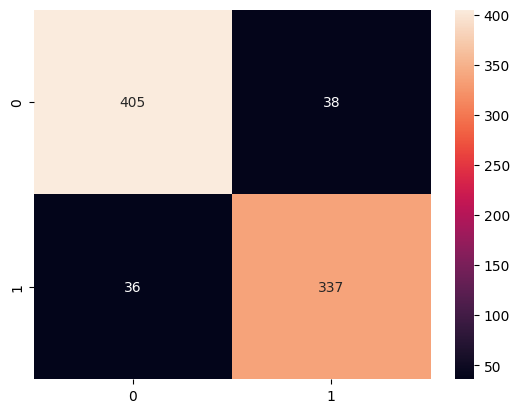

In [ ]:
sns.heatmap(confusion_matrix(y_test,pred_nb_y),annot=True,fmt='d')

Accuracy_score = 0.9093137254901961
precision_score = 0.8986666666666666
recall_score = 0.903485254691689
f1_score = 0.9010695187165776


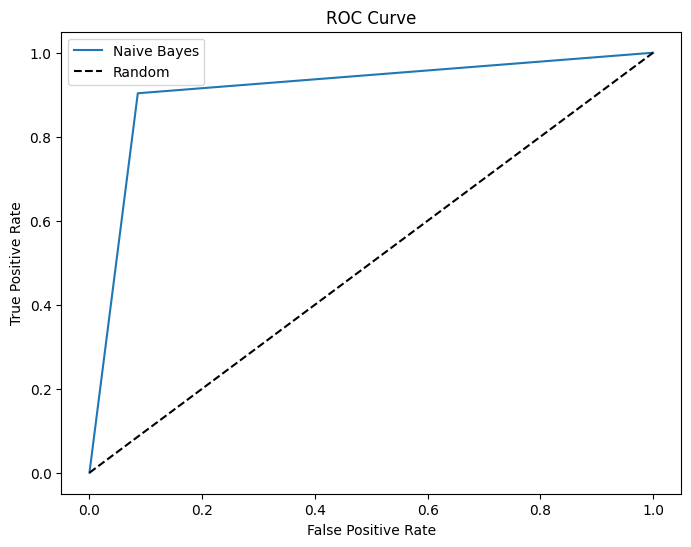

Area Under the Curve (AUC) for Naive Bayes: 0.9088532368266571


In [ ]:
#Naive Bayes
nb = GaussianNB()
nb.fit(x_train, y_train)
pred_nb_y = nb.predict(x_test)

print("Accuracy_score =", accuracy_score(y_test, pred_nb_y ))
print("precision_score =", precision_score(y_test,pred_nb_y ))
print("recall_score =", recall_score(y_test, pred_nb_y ))
print("f1_score =", f1_score(y_test,pred_nb_y ))

# Compute ROC curve using predicted labels (y_pred_rf)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, pred_nb_y)

# Plot ROC curve for Decision Tree
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label= 'Naive Bayes')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate Area Under the Curve (AUC) for Random Forest
auc_score_nb = roc_auc_score(y_test,pred_nb_y)
print('Area Under the Curve (AUC) for Naive Bayes:', auc_score_nb)


In [ ]:
#KNeighbors
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier()
kNN.fit(x_train, y_train)
pred_kNN_y = kNN.predict(x_test)

In [ ]:
print("Accuracy_score =", accuracy_score(y_test, pred_kNN_y ))
print("precision_score =", precision_score(y_test,pred_kNN_y ))
print("recall_score =", recall_score(y_test, pred_kNN_y ))
print("f1_score =", f1_score(y_test,pred_kNN_y ))

Accuracy_score = 0.9031862745098039
precision_score = 0.8994565217391305
recall_score = 0.8873994638069705
f1_score = 0.8933873144399461


In [ ]:
#confusion matrix and classification report
kNN_cm=confusion_matrix(y_test,pred_kNN_y)
print('confusion matrix is',kNN_cm)
print('classification report is',classification_report(y_test,pred_kNN_y))

confusion matrix is [[406  37]
 [ 42 331]]
classification report is               precision    recall  f1-score   support

           0       0.91      0.92      0.91       443
           1       0.90      0.89      0.89       373

    accuracy                           0.90       816
   macro avg       0.90      0.90      0.90       816
weighted avg       0.90      0.90      0.90       816



<Axes: >

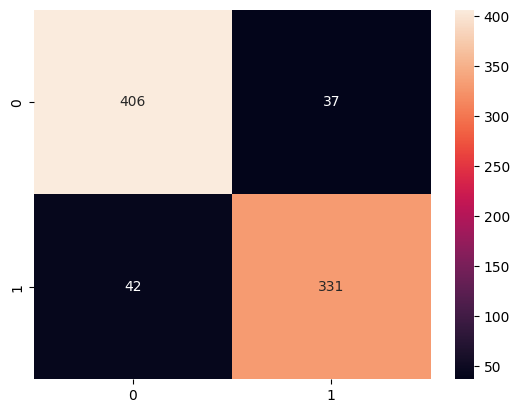

In [ ]:
sns.heatmap(confusion_matrix(y_test,pred_kNN_y),annot=True,fmt='d')

Accuracy_score = 0.9031862745098039
precision_score = 0.8994565217391305
recall_score = 0.8873994638069705
f1_score = 0.8933873144399461


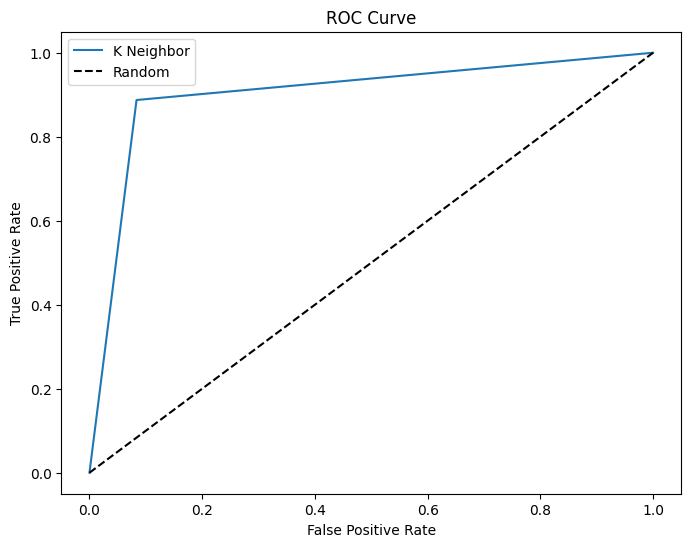

Area Under the Curve (AUC) for K Nearest Neighbor: 0.9019390095558554


In [ ]:
#KNeighbors
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier()
kNN.fit(x_train, y_train)
pred_kNN_y = kNN.predict(x_test)

print("Accuracy_score =", accuracy_score(y_test, pred_kNN_y ))
print("precision_score =", precision_score(y_test,pred_kNN_y ))
print("recall_score =", recall_score(y_test, pred_kNN_y ))
print("f1_score =", f1_score(y_test,pred_kNN_y))

# Compute ROC curve using predicted labels (y_pred_rf)
fpr_kNN, tpr_kNN, thresholds_kNN = roc_curve(y_test, pred_kNN_y)

# Plot ROC curve for Decision Tree
plt.figure(figsize=(8, 6))
plt.plot(fpr_kNN, tpr_kNN, label= 'K Neighbor')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate Area Under the Curve (AUC) for Random Forest
auc_score_kNN = roc_auc_score(y_test,pred_kNN_y)
print('Area Under the Curve (AUC) for K Nearest Neighbor:', auc_score_kNN)


In [ ]:
#Decision Tree
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
pred_dt_y = dt.predict(x_test)

In [ ]:
print("Accuracy_score =", accuracy_score(y_test, pred_dt_y ))
print("precision_score =", precision_score(y_test,pred_dt_y ))
print("recall_score =", recall_score(y_test, pred_dt_y ))
print("f1_score =", f1_score(y_test,pred_dt_y ))

Accuracy_score = 0.8897058823529411
precision_score = 0.8773333333333333
recall_score = 0.8820375335120644
f1_score = 0.8796791443850267


In [ ]:
#confusion matrix and classification report
dt_cm=confusion_matrix(y_test,pred_dt_y)
print('confusion matrix is',dt_cm)
print('classification report is',classification_report(y_test,pred_dt_y))

confusion matrix is [[397  46]
 [ 44 329]]
classification report is               precision    recall  f1-score   support

           0       0.90      0.90      0.90       443
           1       0.88      0.88      0.88       373

    accuracy                           0.89       816
   macro avg       0.89      0.89      0.89       816
weighted avg       0.89      0.89      0.89       816



<Axes: >

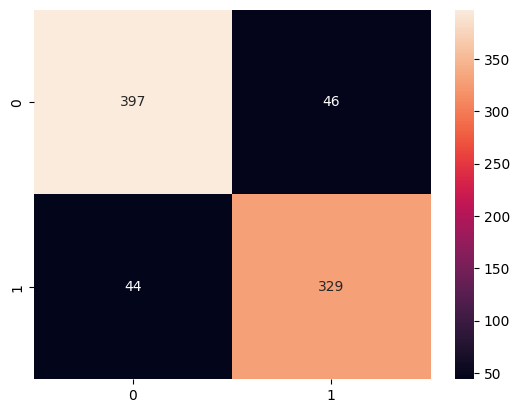

In [ ]:
sns.heatmap(confusion_matrix(y_test,pred_dt_y),annot=True,fmt='d')

Accuracy_score = 0.8897058823529411
precision_score = 0.8733509234828496
recall_score = 0.8873994638069705
f1_score = 0.8803191489361702


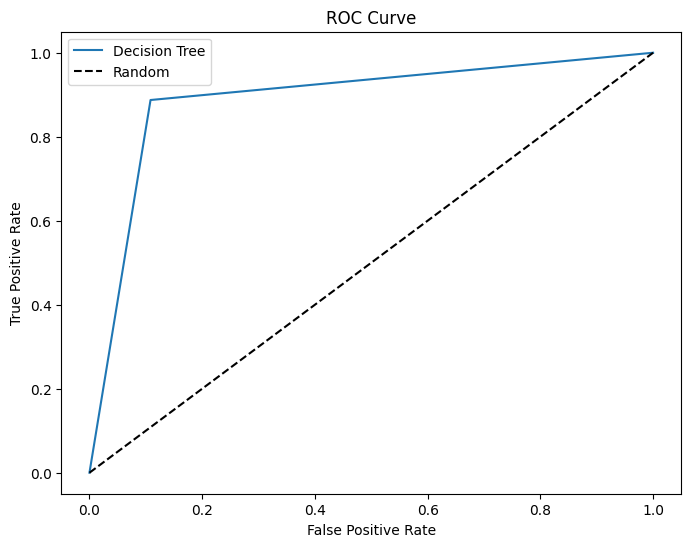

Area Under the Curve (AUC) for Decision Tree: 0.8895236596687223


In [ ]:
#Decision Tree
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
pred_dt_y = dt.predict(x_test)

print("Accuracy_score =", accuracy_score(y_test, pred_dt_y))
print("precision_score =", precision_score(y_test, pred_dt_y))
print("recall_score =", recall_score(y_test, pred_dt_y))
print("f1_score =", f1_score(y_test,pred_dt_y))


fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, pred_dt_y)

# Plot ROC curve for Decision Tree
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate Area Under the Curve (AUC) for Random Forest
auc_score_dt = roc_auc_score(y_test, pred_dt_y)
print('Area Under the Curve (AUC) for Decision Tree:', auc_score_dt)


In [ ]:
#Random Forest
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred_rf_y = rf.predict(x_test)

In [ ]:
print("Accuracy_score =", accuracy_score(y_test, pred_rf_y ))
print("precision_score =", precision_score(y_test,pred_rf_y ))
print("recall_score =", recall_score(y_test, pred_rf_y ))
print("f1_score =", f1_score(y_test,pred_rf_y ))

Accuracy_score = 0.9240196078431373
precision_score = 0.9081364829396326
recall_score = 0.9276139410187667
f1_score = 0.9177718832891246


In [ ]:
#confusion matrix and classification report
rf_cm=confusion_matrix(y_test,pred_rf_y)
print('confusion matrix is',rf_cm)
print('classification report is',classification_report(y_test,pred_rf_y))

confusion matrix is [[408  35]
 [ 27 346]]
classification report is               precision    recall  f1-score   support

           0       0.94      0.92      0.93       443
           1       0.91      0.93      0.92       373

    accuracy                           0.92       816
   macro avg       0.92      0.92      0.92       816
weighted avg       0.92      0.92      0.92       816



<Axes: >

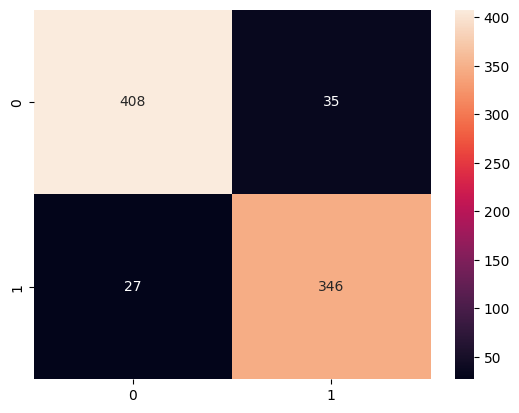

In [ ]:
sns.heatmap(confusion_matrix(y_test,pred_rf_y),annot=True,fmt='d')

Accuracy_score = 0.9240196078431373
precision_score = 0.9038961038961039
recall_score = 0.9329758713136729
f1_score = 0.9182058047493403


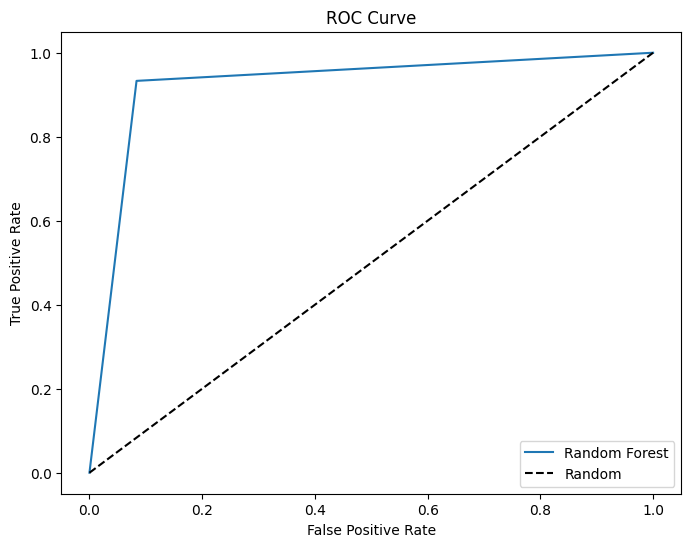

Area Under the Curve (AUC) for Random Forest: 0.9247272133092067


In [ ]:
# Random Forest
from sklearn.metrics import roc_curve, roc_auc_score
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

print("Accuracy_score =", accuracy_score(y_test, y_pred_rf))
print("precision_score =", precision_score(y_test, y_pred_rf))
print("recall_score =", recall_score(y_test, y_pred_rf))
print("f1_score =", f1_score(y_test, y_pred_rf))

# Compute ROC curve using predicted labels (y_pred_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)

# Plot ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate Area Under the Curve (AUC) for Random Forest
auc_score_rf = roc_auc_score(y_test, y_pred_rf)
print('Area Under the Curve (AUC) for Random Forest:', auc_score_rf)


In [ ]:
models = {"Logistic Regression": LogisticRegression(),
          "kNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "naive-bayes": GaussianNB(),
          "Support vector Machine": SVC(),
          "Decision Tree": DecisionTreeClassifier()}

# Create function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Logistic Regression': 0.9142156862745098,
 'kNN': 0.9031862745098039,
 'Random Forest': 0.9240196078431373,
 'naive-bayes': 0.9093137254901961,
 'Support vector Machine': 0.9215686274509803,
 'Decision Tree': 0.8884803921568627}